In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

username                   object
text                       object
Ticker                     object
Name                       object
Industry                   object
Total ESG Risk Score        int64
Environment Risk Score    float64
Social Risk Score         float64
Governance Risk Score     float64
user_id                     int64
text_tokenized             object
dtype: object


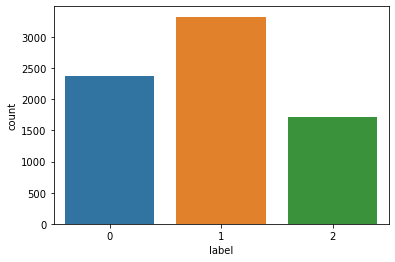

In [2]:
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv('../50_tweets_companies.zip')
df = df.drop('Unnamed: 0', axis=1)
print(df.dtypes)
def encode_esg_category(x):
    switch = [20, 30, 40]

    for i, a in enumerate(switch):
        if x < a:
            return i
    return 2

df['label'] = df['Total ESG Risk Score'].transform(encode_esg_category)


usernames = df['username'].unique()
np.random.seed(30)
np.random.shuffle(usernames)

train_split = 0.8
train_size = int(train_split * usernames.shape[0])
train_usernames = usernames[:train_size]
# test_usernames = usernames[train_size:]

# shuffles dataset
df = df.sample(frac=1)
train_mask = df['username'].isin(train_usernames)
test_mask = ~df['username'].isin(train_usernames)


df_new = df[['text_tokenized', 'label']]
train_df = df_new[train_mask]
test_df = df_new[test_mask]


train_df.to_csv('../data/tweets_50_shuffled_train.csv')
test_df.to_csv('../data/tweets_50_shuffled_test.csv')

# print(train_df.shape)
# print(test_df.shape)
#
# X_train = train_df['text_tokenized']
y_train = train_df['label']
# X_test = test_df['text_tokenized']
y_test = test_df['label']

sns.countplot(x=y_train);

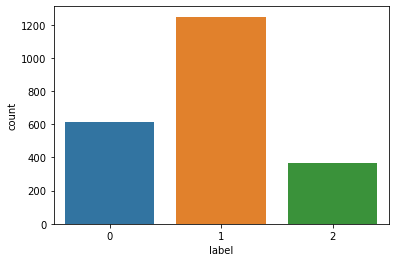

In [3]:
sns.countplot(x=y_test);

In [4]:

# df['Total ESG Risk Score'][df['Total ESG Risk Score'] < 10]
# bins = KBinsDiscretizer(encode='ordinal', strategy='uniform')
# df['env'] = bins.fit_transform(df['Environment Risk Score'].to_numpy().reshape(-1, 1))
#
df['label'].value_counts()
# df['Environment Risk Score'].mean()

1    4577
0    2991
2    2085
Name: label, dtype: int64